### Histogramas con funciones


In [ ]:
#Importar todos los paquetes requeridos

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [ ]:
### Histograma con funciones##

csv_path = Path("data/categorias_de_corredores.csv")
df_corredores = pd.read_csv(csv_path, sep="\t", index_col=0)
print(df_corredores.info())
print(df_corredores.head())

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\carlo\AppData\Local\Temp\ipykernel_38024\3698877456.py:3: SyntaxWarning: invalid escape sequence '\c'
  csv_path = Path("data\categorias_de_corredores.csv")
C:\Users\carlo\AppData\Local\Temp\ipykernel_38024\3698877456.py:3: SyntaxWarning: invalid escape sequence '\c'
  csv_path = Path("data\categorias_de_corredores.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'data\\categorias_de_corredores.csv'

In [ ]:
#Creamos el histograma de la variable tiempo 

def crear_histograma (variable):
    plt.figure(1)
    plt.hist(atletas[variable],15,color="yellow",ec="black")
    plt.title("Histograma Tiempo")
    plt.savefig('Histogramas.jpg')

crear_histograma ("Tiempo")

plt.figure(2)
sns.countplot(x=atletas['Velocidad'],palette='ocean')
plt.savefig("Velocidades.jpg")

#Si queremos saber las velocidades en hombres y mujeres
plt.figure(3)
grafico3=sns.countplot(x= 'Genero', hue = 'Velocidad', palette= 'hot_r', data= atletas)
grafico3.set(title='Velocidades por Género', xlabel= 'Género', ylabel= 'Total')
plt.title ("Gráfico de Barras x Género")
plt.savefig("Genero.jpg")
plt.show()

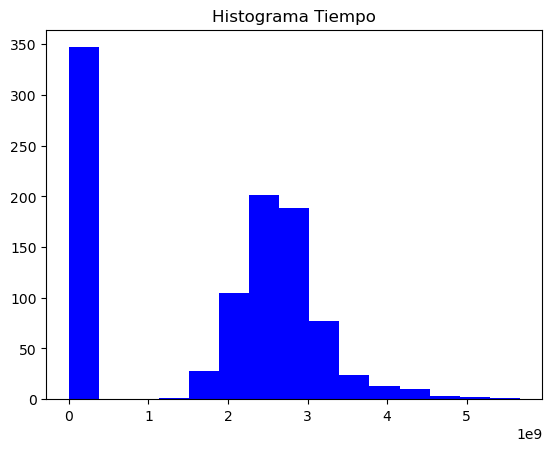

In [5]:
# Importar todos los paquetes requeridos

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Leer archivo a analizar
atletas = pd.read_csv(r"C:\Users\leona\OneDrive\Desktop\MCD\1er_Semestre\Programacion\Sesion_1\categorias_de_corredores.csv",sep="\t",index_col=0)

#Creamos una función que cree el histograma 
def crear_histograma (variable):
    plt.figure(1)
    plt.hist(atletas[variable],15,color="blue",ec="black")
    plt.title(f"Histograma {variable}")
    plt.savefig(f"{variable}.jpg")

crear_histograma ("Tiempo")

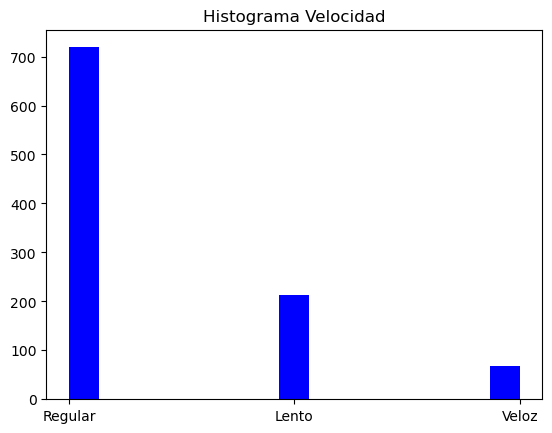

In [6]:
crear_histograma ("Velocidad")

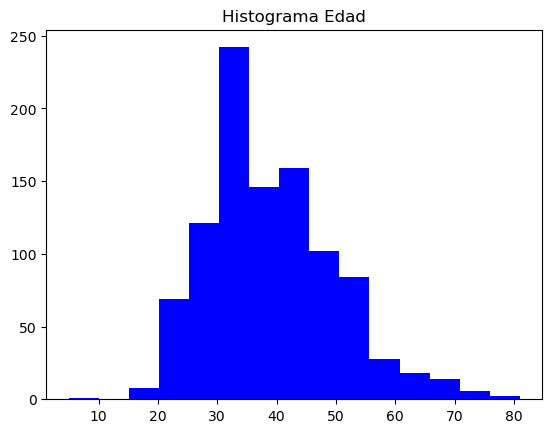

In [21]:
crear_histograma ("Edad")

### Dos histogramas con una función

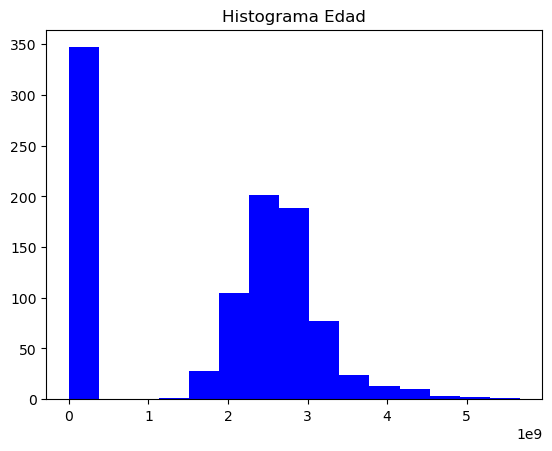

In [7]:
variable=["Tiempo","Edad"]

for i in variable:
    crear_histograma (i)

### Desplegando los dos Histogramas Correctamente 


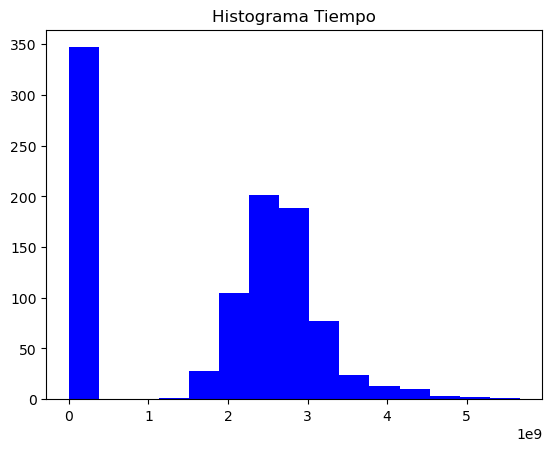

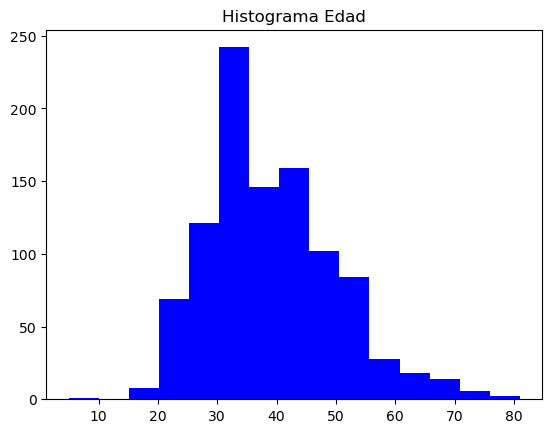

In [8]:
def crear_histograma2 (variable,j):
    plt.figure(j)
    plt.hist(atletas[variable],15,color="blue",ec="black")
    plt.title(f"Histograma {variable}")
    plt.savefig(f"{variable}.jpg")

variable=["Tiempo","Edad"]
j=1

for i in variable:
    crear_histograma2 (i,j)
    j +=1

### Utilizando diferentes colores en los Histogramas

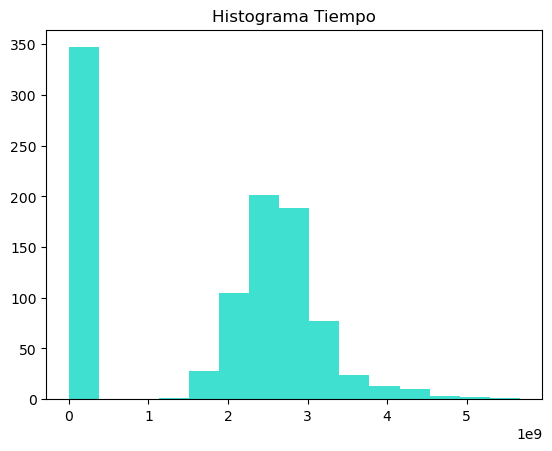

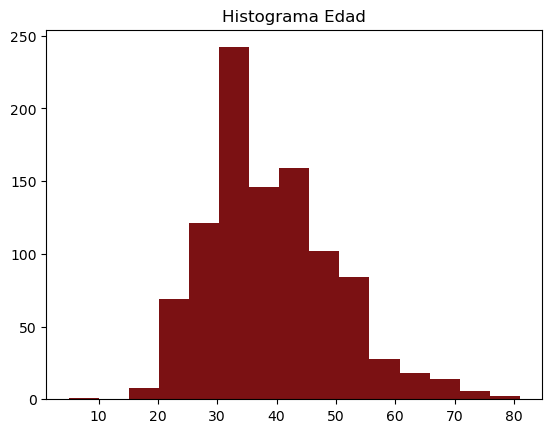

In [11]:
def crear_histograma3 (variable,j,z):
    plt.figure(j)
    plt.hist(atletas[variable],15,color=z,ec="black")
    plt.title(f"Histograma {variable}")
    plt.savefig(f"{variable}.jpg")

variable=["Tiempo","Edad"]
colores=["Turquoise","#7b1113"]
j=1
z=0

for i in variable:
    crear_histograma3 (i,j,colores[z])
    j +=1
    z +=1